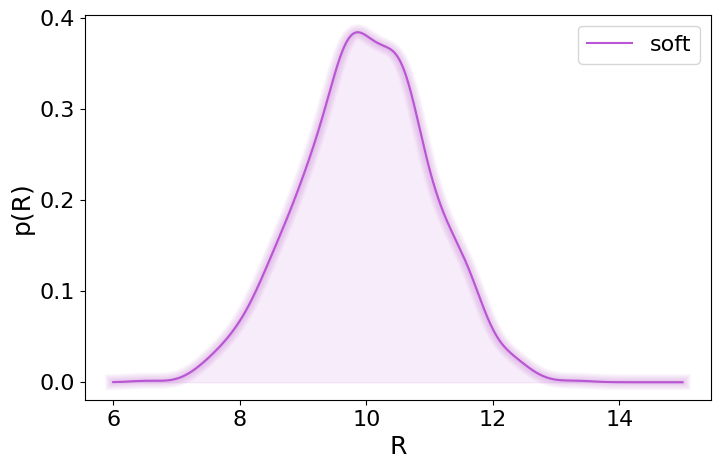

In [45]:
import numpy as np
import scipy.stats 
from scipy.stats import gaussian_kde as kde
from scipy.stats import norm
import matplotlib.pyplot as plot
import random
import mplcyberpunk 

#Soft
np.random.seed(11)

A = norm(loc = 10, scale = 1)
B = A.rvs(size = 1000)
samples1 = np.sort(B)
#samples

x1 =  np.linspace(6,15,1000)
kernel1 = kde(samples1)
kde1 = kernel1.pdf(x1)

plot.plot(x1,kde1 , label = "soft")
plot.xlabel("R")
plot.ylabel("p(R)")
plot.legend()
mplcyberpunk.add_glow_effects()

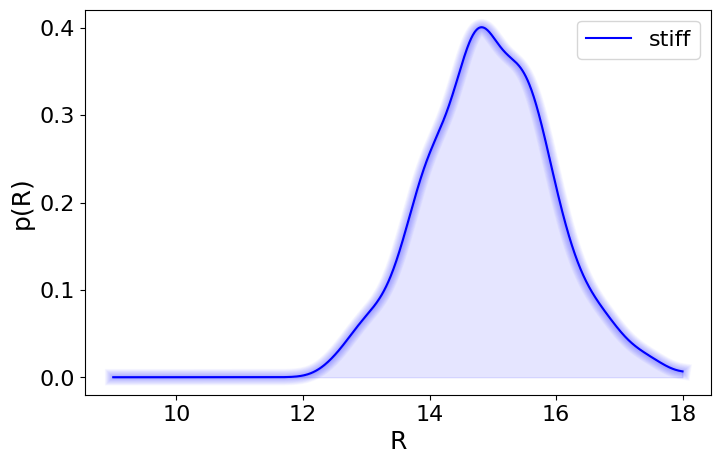

In [46]:
#Stiff

np.random.seed(2)
A = norm(loc = 15, scale = 1)
B = A.rvs(size = 1000)
samples2 = np.sort(B)
#samples

x2 =  np.linspace(9,18,1000)
kernel2 = kde(samples2)
kde2 = kernel2.pdf(x2)

plot.plot(x2,kde2 , label = "stiff" , color = "blue")
plot.xlabel("R")
plot.ylabel("p(R)")
plot.legend()
mplcyberpunk.add_glow_effects()

In [47]:
##importing 

import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk
import scipy.stats as st
import matplotlib
import matplotlib.lines as mlines
import matplotlib.patheffects as pfx
from scipy.interpolate import interp1d
from scipy.stats import gaussian_kde as kde
from scipy.stats.mstats import mquantiles as mq
from pesummary.core.plots.bounded_1d_kde import bounded_1d_kde
from glob import glob
import pandas as pd
import sys 
import os
import pickle
import dill
from astropy import cosmology as co
from astropy.units import *

## Importing the accompanying utility and analysis files
sys.path.append(os.path.abspath('../hbpm_utils/'))
from hbpm_utils import *
from importlib import reload
reload(sys.modules["hbpm_utils"])
from hbpm_utils import *
sys.path.append(os.path.abspath('..'))
from hbpm_analysis import run_analysis
reload(sys.modules["hbpm_analysis"])
from hbpm_analysis import run_analysis

## my preferred figure settings
matplotlib.rcParams['figure.figsize'] = (8.08, 5.)
matplotlib.rcParams['xtick.labelsize'] = 16.0
matplotlib.rcParams['ytick.labelsize'] = 16.0
matplotlib.rcParams['axes.labelsize'] = 18.0
matplotlib.rcParams['legend.fontsize'] = 16
matplotlib.rcParams['axes.titlesize'] = 22
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["mediumorchid", "teal", "goldenrod","slategray"])

In [38]:
post_bandwidth = 0.15
prior_bandwidth = 0.4
seed = 170817

In [39]:
## fine grid
fs = np.linspace(1.5,4,200)
Ms = np.linspace(0.8,1.8,200)

In [40]:
## R prior 
# Rprior_kernel_mm, R16samples_mm 
Rs = np.linspace(9,15,200)
Rsamples_mm = samples1
Rprior_kernel_ =  kernel1
zeros = np.zeros(1000)


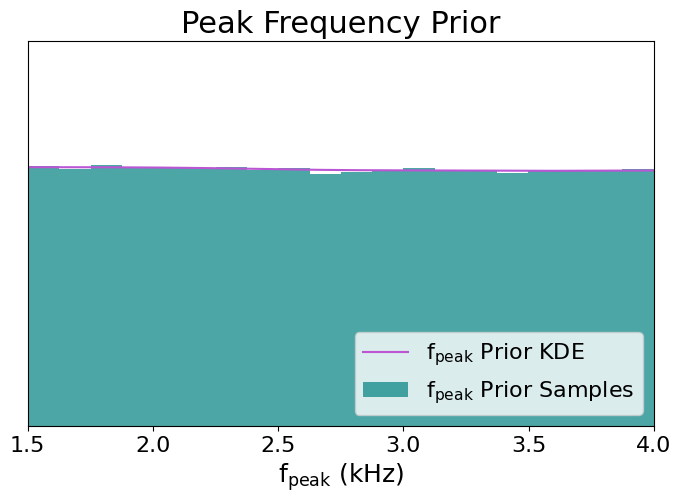

In [41]:
## get the fpeak prior

with open('../priors/fprior.pickle','rb') as f:
    fprior = dill.load(f)
## plot the fpeak prior
plt.figure()
plt.plot(fs,fprior.pdf(fs),label='$\\mathrm{f_{peak}}$ Prior KDE')
plt.hist(fprior.samples,density=True,alpha=0.7,label='$\mathrm{f_{peak}}$'+' Prior Samples',bins=20)
plt.xlabel('$\mathrm{f_{peak}}$ (kHz)')
plt.xlim(1.5,4)
plt.ylim(0,0.6)
plt.yticks([])
plt.title('Peak Frequency Prior')
plt.legend(loc='lower right')
# plt.savefig('./figures/fpeak_noise_prior.pdf',bbox_inches='tight')
# plt.savefig('./figures/fpeak_noise_prior.png',bbox_inches='tight')
plt.show()

In [42]:
#Importing all the information needed

fprior_spec = '../priors/fprior.pickle'
database1 = '../observing_run_sims/O4O5'
database2 = '../observing_run_sims/O4O5'
coeffs = pd.read_csv('../priors/sampled_empirical_relation_coefficients14.tab',sep=' ')
A = coeffs.to_numpy()
coeffs 

,(Intercept),M_chirp,I(M_chirp^2),I(R_1.4 * M_chirp),I(R_1.4 * M_chirp^2),I(R_1.4^2 * M_chirp)
0,0.638235,10.555983,0.114533,-1.065293,-0.004920,0.029312
1,0.656314,9.260437,1.179926,-0.975196,-0.081465,0.029438
2,0.701299,13.148044,0.604065,-1.498334,-0.046066,0.047218
3,0.151542,11.556026,0.542036,-1.169676,-0.051627,0.035003
4,-1.168409,16.452000,-1.501631,-1.483807,0.031844,0.043677
...,...,...,...,...,...,...
995,-1.096688,14.283949,-2.755365,-1.027577,0.123726,0.021543
996,2.091358,9.918190,2.687957,-1.450965,-0.136016,0.049362
997,0.876874,12.766631,0.880935,-1.485465,-0.055351,0.046619
998,2.332250,10.484103,3.116738,-1.627536,-0.149189,0.056550


In [11]:
# samples_mm = pd.DataFrame(Rsamples_mm)
# #df = pd.read_csv("../priors/HBI.txt")
# samples_mm.to_csv("HBI.txt" , index=False)

# samples_mm

In [145]:
#samples_mm.to_csv("../priors/HBI.txt" ,index = False)

In [146]:
# samples_mm_new = pd.read_csv("../priors/HBI.txt")
# samples_mm_new

In [147]:
# samples_mm_new["New Column"] = zeros 
# samples_mm_new.to_csv("../priors/HBI.txt" , index=False , sep = '\t')

Running a hierarchical Bayesian post-merger analysis...
Loading priors...


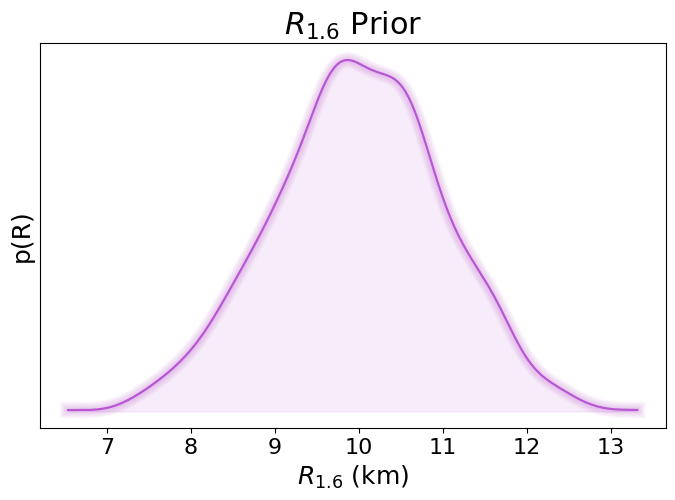

Loading simulation data...
Generating event dictionary...


100%|==================================================================================================================================================| 26/26 [00:53<00:00,  2.05s/it]


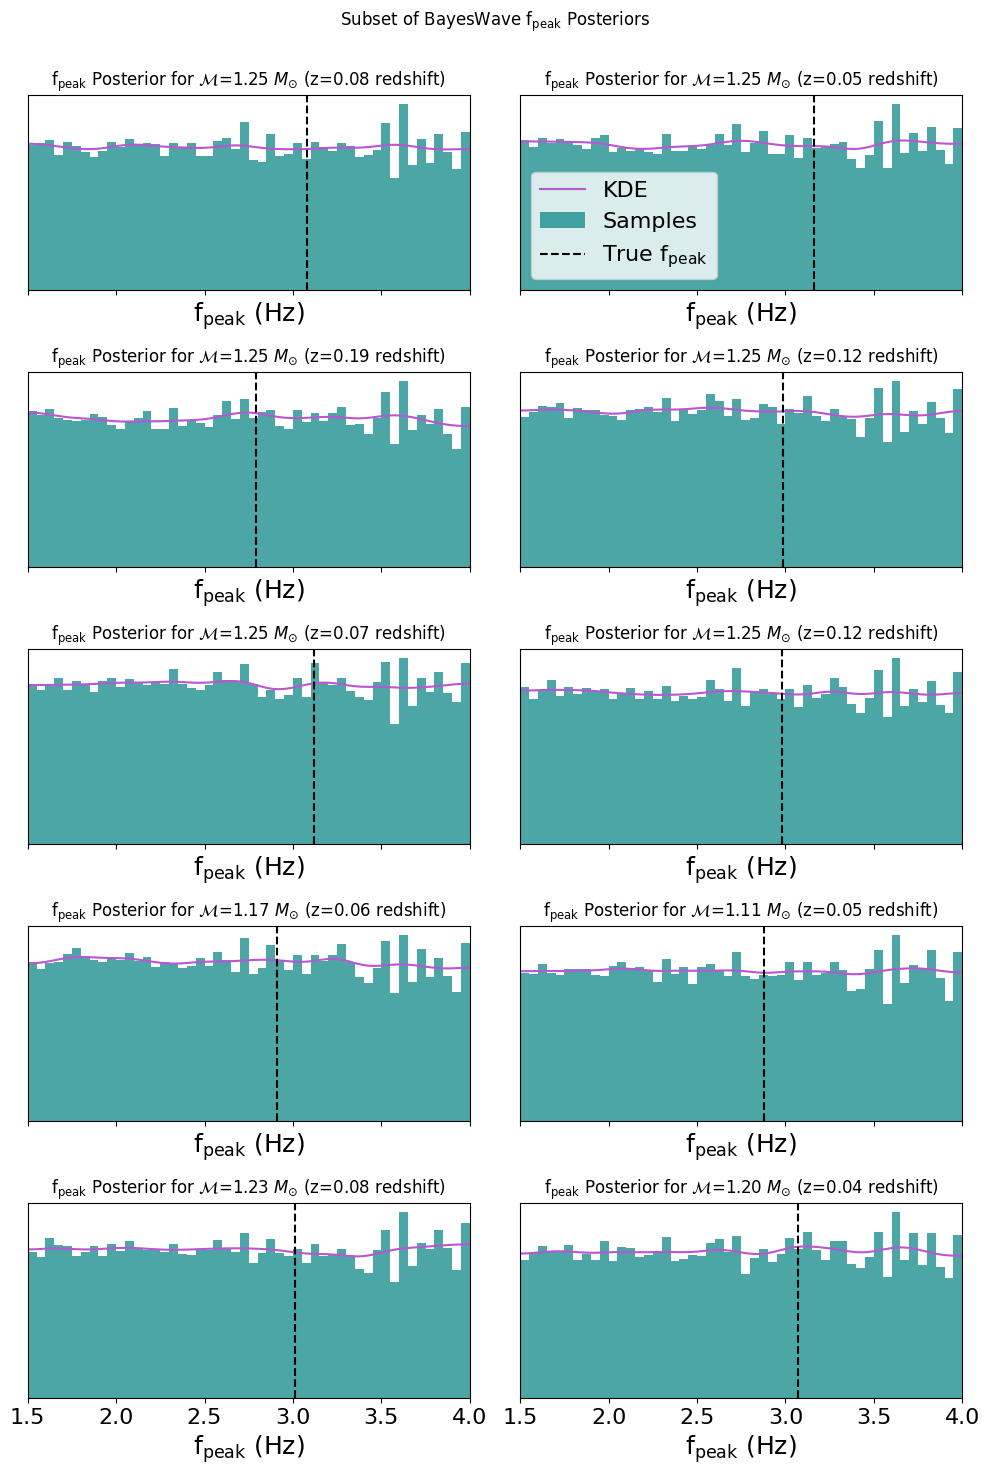

Computing likelihoods...


100%|==================================================================================================================================================| 26/26 [00:03<00:00,  6.70it/s]


Saving outputs to ./sfhx/
Saved file to ./sfhx/.pickle
Creating plots...


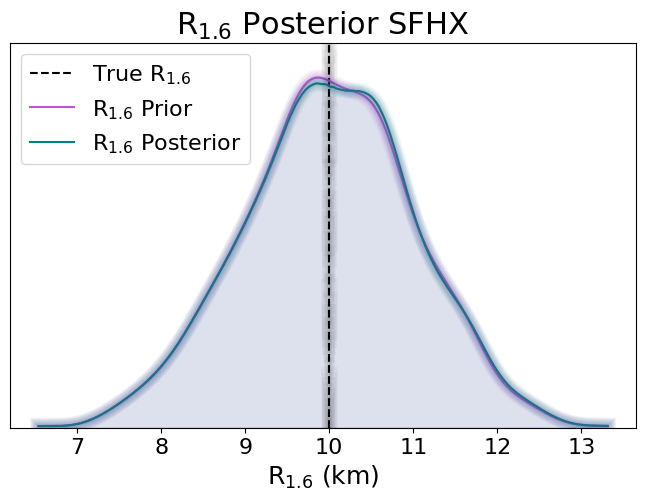

R_1.6 = 10.00 (+1.98,-2.10) km
Done!


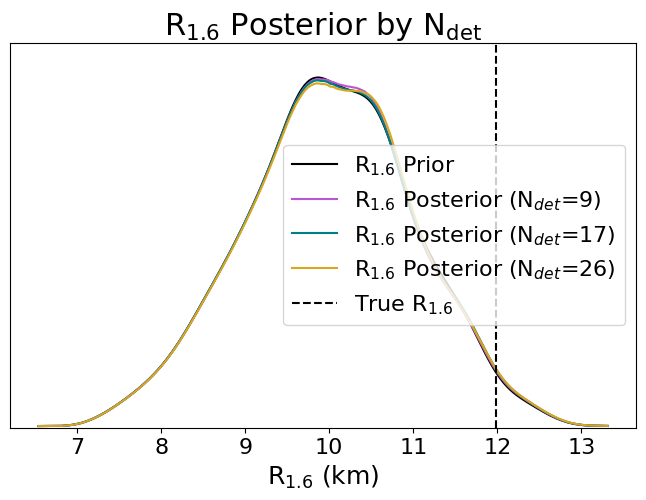

In [48]:
#O4 Soft
sfhx_O4_datadir = database1+'/sfhx_O4'
Rs_sfhx_O4z,likes_sfhx_O4z,post_sfhx_O4z,stats_sfhx_O4z,postdict_sfhx_O4z = run_analysis(sfhx_O4_datadir,
                                                                     fprior_spec,
                                                               "../priors/HBI.txt",
                                                                                       # 'uniform',
                                                                                         'sfhx',
                                                                '../observing_run_sims/O4_events_updated.csv',
                                                               '../nr_files/sfhx_event_parameters.csv'
                                                               , saveto = './sfhx/',#bootstrap=A,
                                                                     prior_bandwidth=prior_bandwidth,
                                                                 posterior_bandwidth=post_bandwidth,
                                                                z_adj='known',Mchirp_scaling=None,
                                                                Mchirp_scatter=True,weighted_Rprior=None,
                                                                   ifos='H1,L1,V1',
                                                                   aggregation='sum',seed=seed)

Running a hierarchical Bayesian post-merger analysis...
Loading priors...


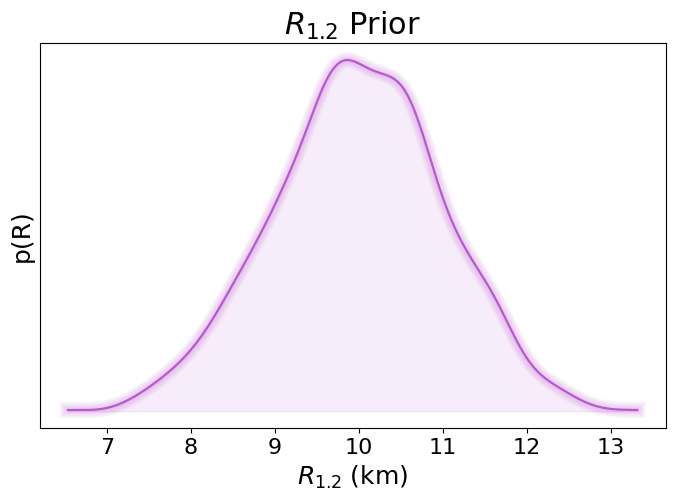

Loading simulation data...
Generating event dictionary...


100%|==================================================================================================================================================| 83/83 [03:48<00:00,  2.76s/it]


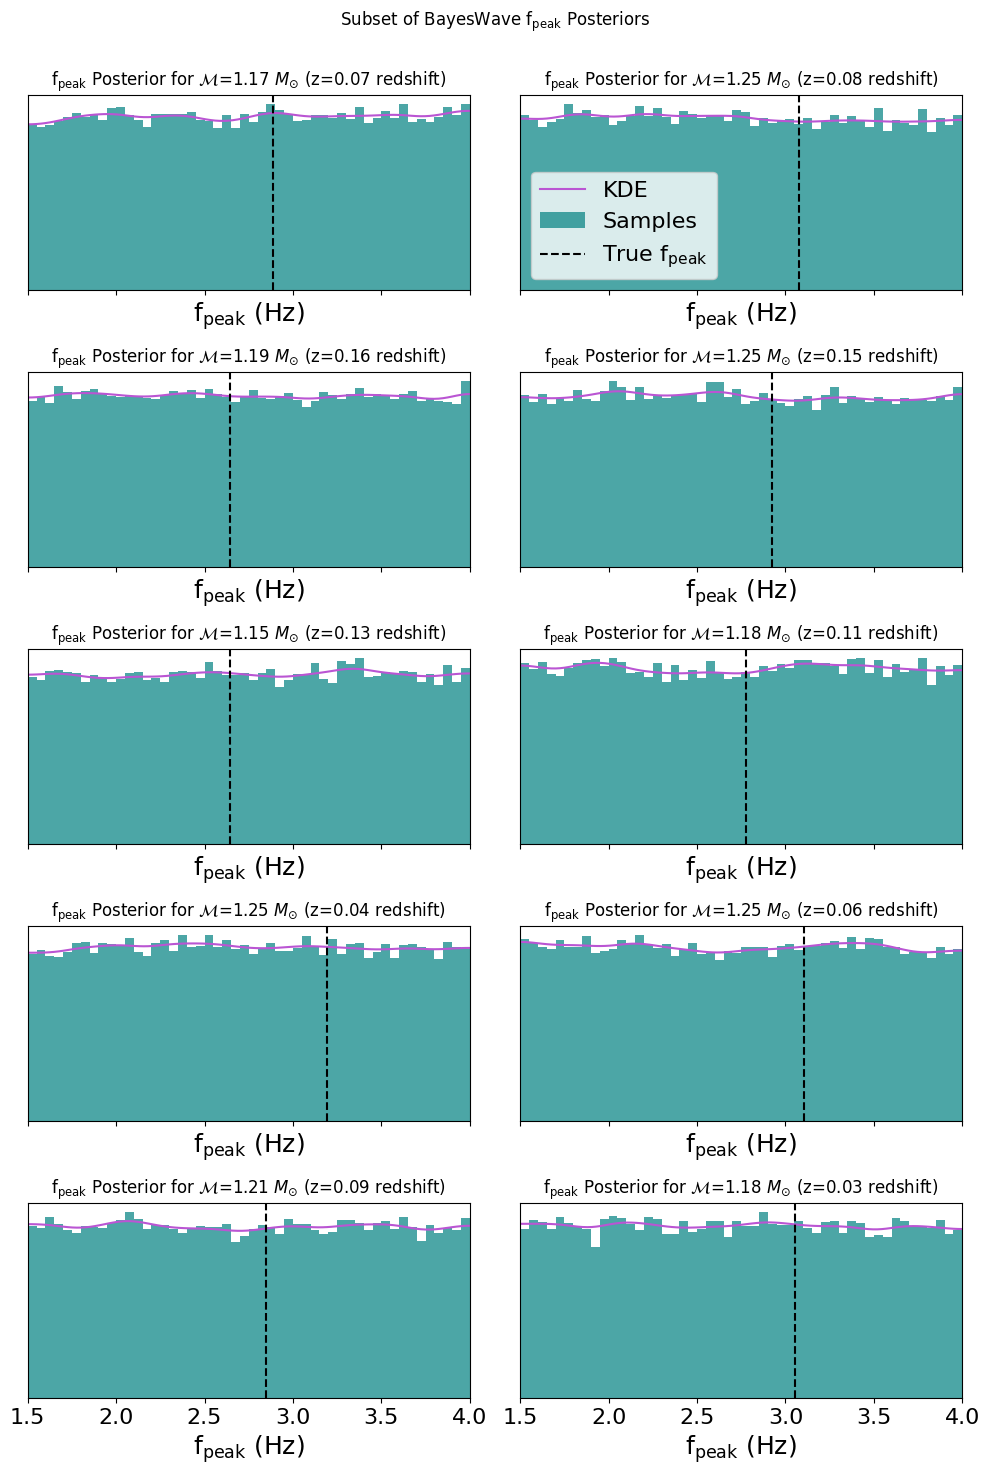

Computing likelihoods...


100%|==================================================================================================================================================| 83/83 [00:18<00:00,  4.61it/s]


Saving outputs to ./sfhx/
Saved file to ./sfhx/.pickle
Creating plots...


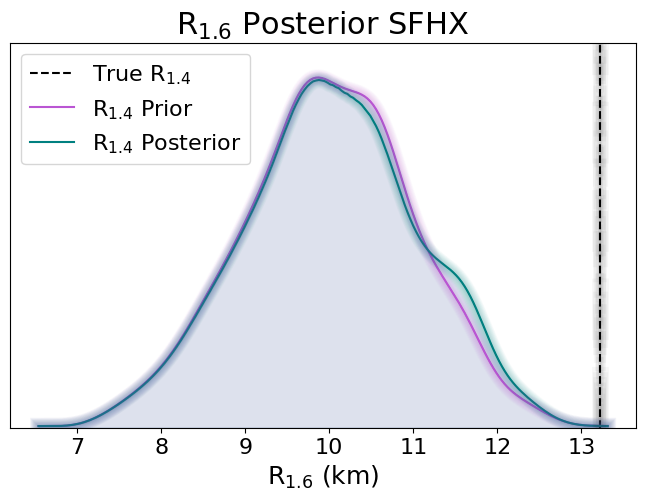

R_1.6 = 10.03 (+1.99,-2.13) km
Done!


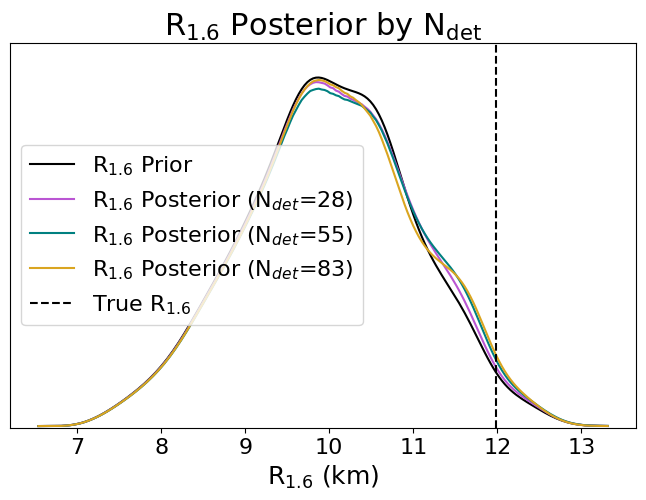

In [13]:
sfhx_O5_datadir = database2+'/sfhx_O5'
Rs_sfhx_O5z,likes_sfhx_O5z,post_sfhx_O5z,stats_sfhx_O5z,postdict_sfhx_O5z = run_analysis(sfhx_O5_datadir,
                                                                     fprior_spec,
                                                               "../priors/HBI.txt",
                                                                                       # 'uniform',
                                                                                         'sfhx',
                                                                '../observing_run_sims/O5_events_updated.csv',
                                                               '../nr_files/sfhx_event_parameters.csv'
                                                               , saveto = './sfhx/',#bootstrap=A,
                                                                     prior_bandwidth=prior_bandwidth,
                                                                 posterior_bandwidth=post_bandwidth,
                                                                z_adj='known',Mchirp_scaling=None,
                                                                Mchirp_scatter=True,weighted_Rprior=None,
                                                                   ifos='H1,L1,V1',
                                                                   aggregation='sum',seed=seed)

In [49]:
O4O5_post_dict = {**postdict_sfhx_O4z,**postdict_sfhx_O5z}

In [50]:
Rs_O4O5, Rprior_kernel_O4O5, likes_O4O5 = unpack_posterior_dict(O4O5_post_dict)

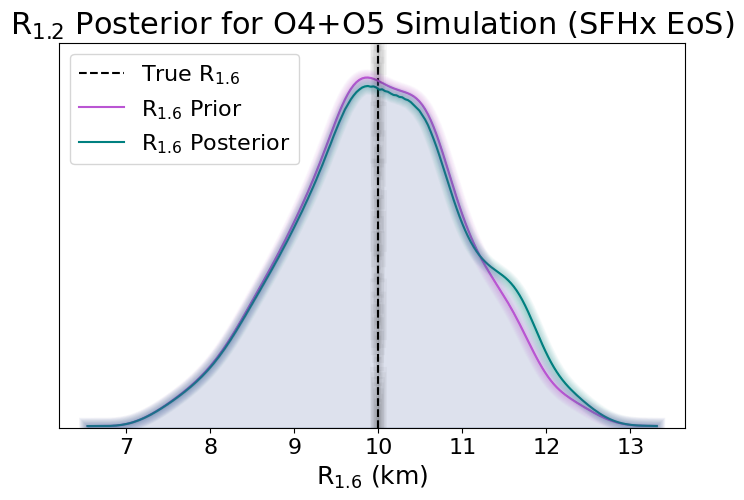

In [51]:
plot_aggregate_posterior(Rs_O4O5,likes_O4O5,Rprior_kernel_O4O5,Rtrue=10,glow=True,
#                         saveto='./tutorialoutputs/R1.6_SFHX_O4O5_simulation_posterior.png',
                         title='$\mathrm{R_{1.2}}$ Posterior for O4+O5 Simulation (SFHx EoS)')

In [21]:
post_O4O5 = get_posterior(Rs_O4O5,get_aggregate_likelihood(likes_O4O5),Rprior_kernel_O4O5)
O4O5_mean, O4O5_low, O4O5_high = get_post_stats(post_O4O5,Rs_O4O5)
print(O4O5_mean)

R_1.6 = 10.04 (+2.01,-2.14) km
10.04207398606769
